In [7]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3) (1).zip


In [10]:
import zipfile
import os

# Nom du fichier uploadé
zip_filename = "archive (3) (1).zip"

# Dézipper dans un dossier "data"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("data")

print("Fichiers extraits :")
os.listdir("data")


Fichiers extraits :


['IEA Global EV Data 2024.csv']

In [11]:
import pandas as pd

# Trouver le fichier CSV automatiquement
csv_files = [f for f in os.listdir("data") if f.endswith(".csv")]

if len(csv_files) == 0:
    print("Aucun fichier CSV trouvé.")
else:
    csv_file = "data/" + csv_files[0]
    print("CSV détecté :", csv_file)

    df = pd.read_csv(csv_file)
    print("Shape:", df.shape)
    df.head()


CSV détecté : data/IEA Global EV Data 2024.csv
Shape: (12654, 8)


In [12]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [13]:
# ================================
# 1) UPLOAD + EXTRACTION DU ZIP
# ================================
from google.colab import files
import zipfile
import os
import pandas as pd

uploaded = files.upload()

# Détection automatique du zip
zip_filename = list(uploaded.keys())[0]

# Extraction
with zipfile.ZipFile(zip_filename, 'r') as z:
    z.extractall("data")

print("Fichiers extraits :", os.listdir("data"))

# ================================
# 2) LECTURE AUTOMATIQUE DU CSV
# ================================
csv_files = [f for f in os.listdir("data") if f.endswith(".csv")]

if len(csv_files) == 0:
    raise Exception("Aucun CSV détecté dans votre fichier ZIP !")

csv_file = "data/" + csv_files[0]
print("CSV trouvé :", csv_file)

df = pd.read_csv(csv_file)
df.head()


Saving archive (3).zip to archive (3) (2).zip
Fichiers extraits : ['IEA Global EV Data 2024.csv']
CSV trouvé : data/IEA Global EV Data 2024.csv


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [14]:
# ================================
# PREPROCESSING COMPLET
# ================================
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

print("Shape initial :", df.shape)

# 1. Supprimer les doublons
df = df.drop_duplicates()
print("Après suppression des doublons :", df.shape)

# 2. Séparation des colonnes
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Colonnes numériques :", num_cols)
print("Colonnes catégorielles :", cat_cols)

# 3. Gestion des valeurs manquantes
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# 🎯 Identifier la target
target = "y" if "y" in df.columns else df.columns[-1]

X = df.drop(columns=[target])
y = df[target].apply(lambda x: 1 if str(x).lower()=="yes" else 0)

# 4. Encodage + Normalisation via Pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

print("=== Préprocessing terminé ===")


Shape initial : (12654, 8)
Après suppression des doublons : (12654, 8)
Colonnes numériques : ['year', 'value']
Colonnes catégorielles : ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']
=== Préprocessing terminé ===


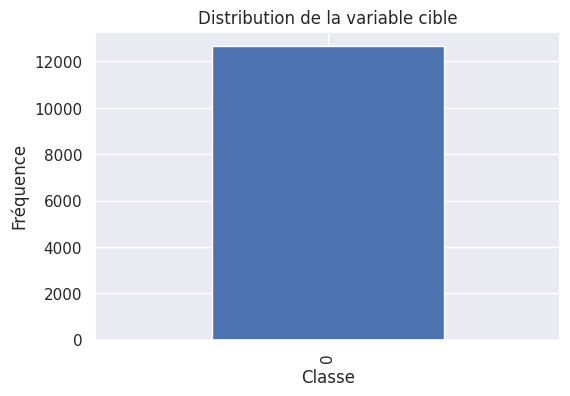


INTERPRÉTATION :
Si les classes sont très déséquilibrées, cela signifie que le modèle pourrait
avoir du mal à prédire la classe minoritaire. Un rééquilibrage sera nécessaire.



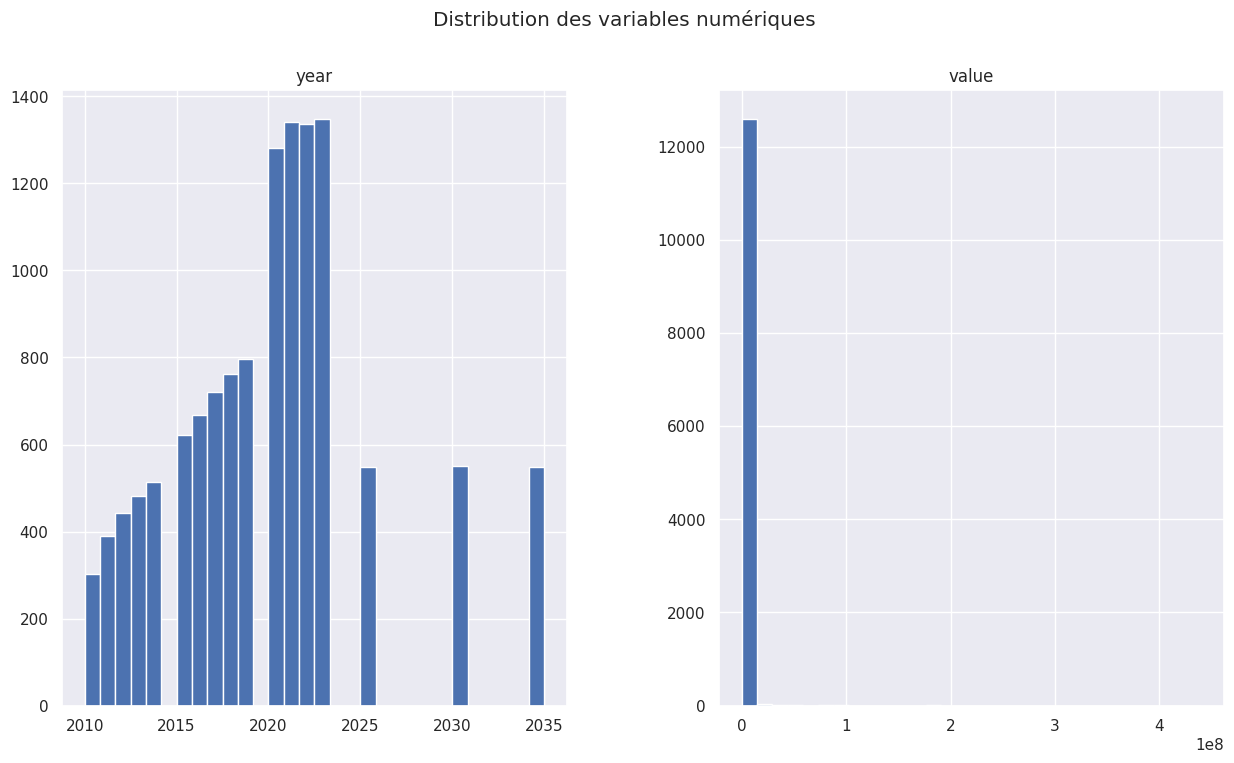


INTERPRÉTATION :
Ces distributions permettent d'identifier les asymétries, outliers et transformations
potentielles (log-transform, normalisation…).



<Figure size 1500x800 with 0 Axes>

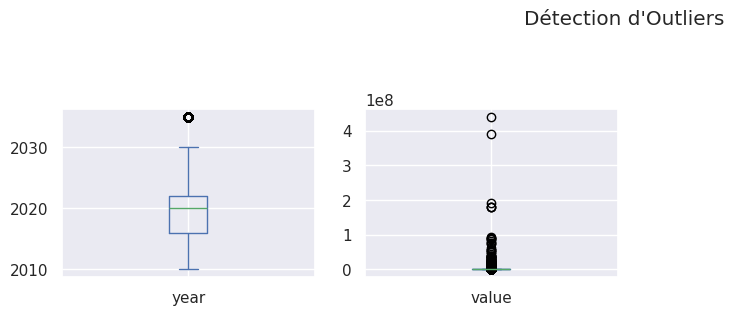


INTERPRÉTATION :
Les boxplots montrent les valeurs extrêmes (outliers) qui peuvent influencer
négativement la performance des modèles sensibles aux échelles.



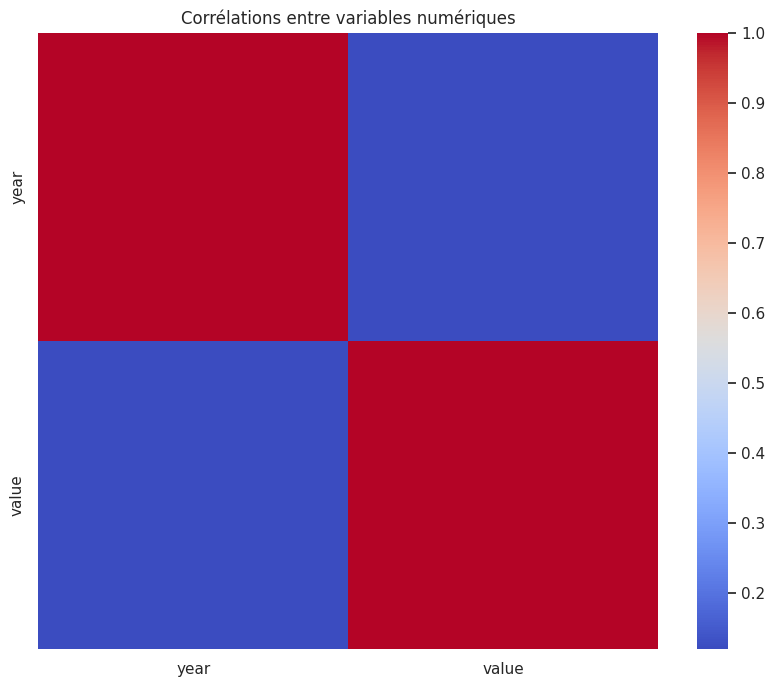


INTERPRÉTATION :
La heatmap montre les relations linéaires entre variables.
Une forte corrélation indique des variables redondantes qu’on peut éliminer
ou combiner.



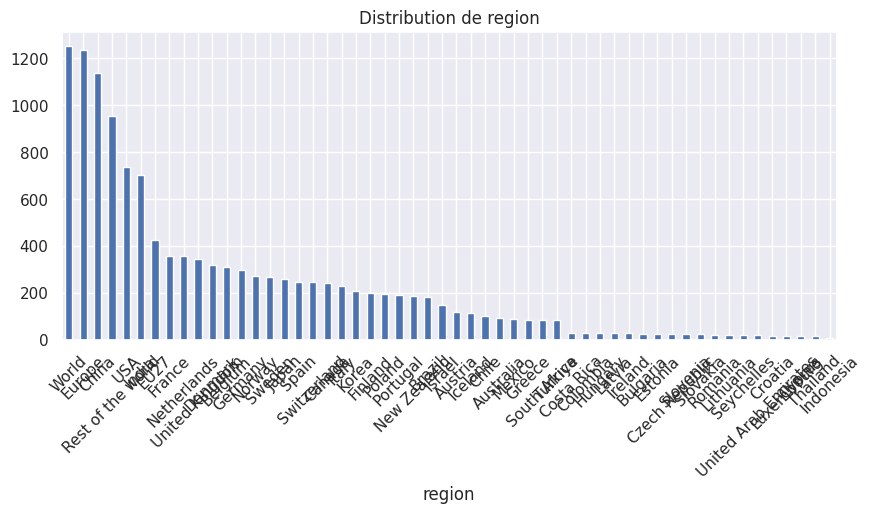


INTERPRÉTATION (region) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



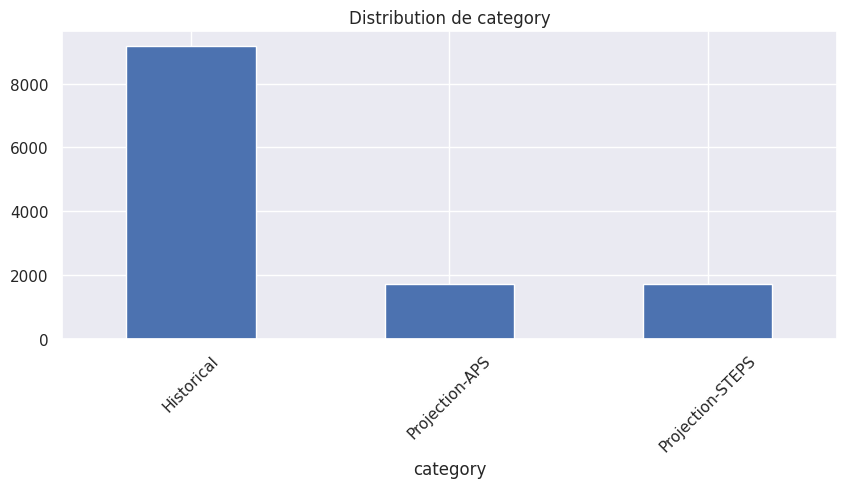


INTERPRÉTATION (category) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



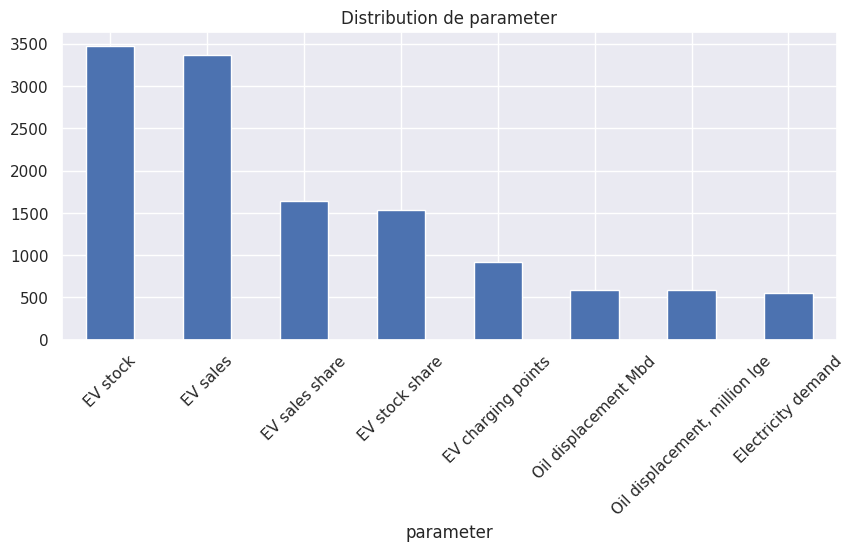


INTERPRÉTATION (parameter) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



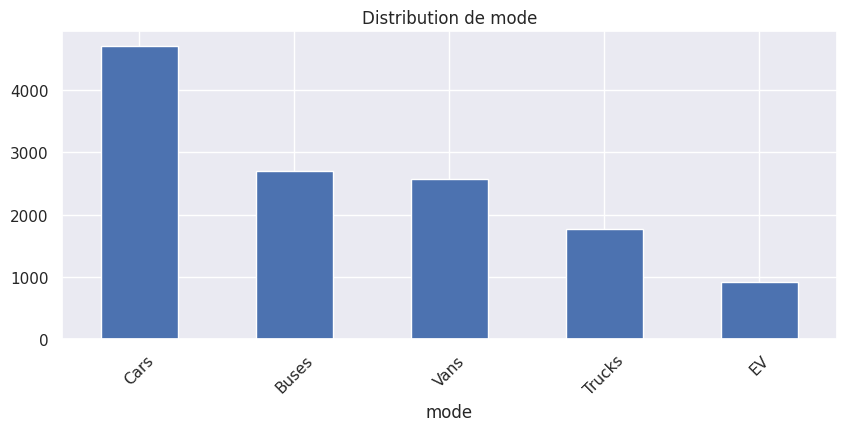


INTERPRÉTATION (mode) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



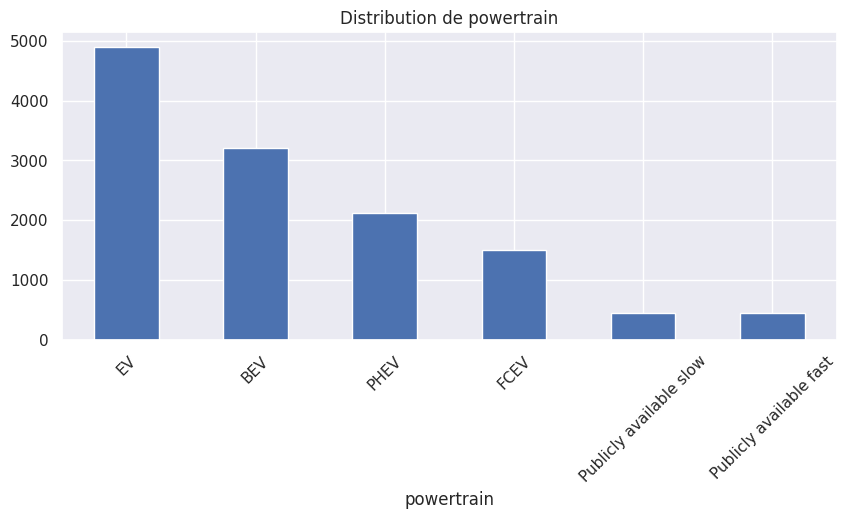


INTERPRÉTATION (powertrain) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



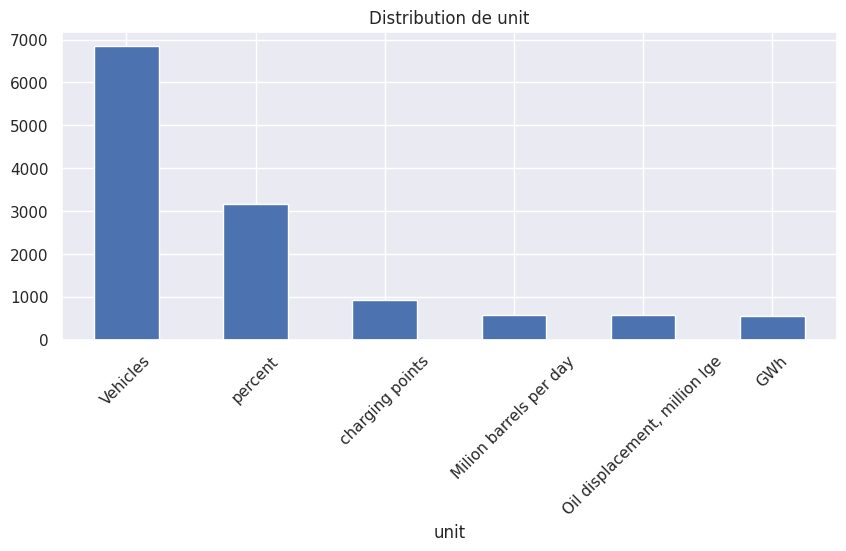


INTERPRÉTATION (unit) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.



In [15]:
# ================================
# EDA COMPLET
# ================================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# ----------- A. Distribution de la target -----------
plt.figure(figsize=(6,4))
y.value_counts().plot(kind="bar")
plt.title("Distribution de la variable cible")
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.show()

print("""
INTERPRÉTATION :
Si les classes sont très déséquilibrées, cela signifie que le modèle pourrait
avoir du mal à prédire la classe minoritaire. Un rééquilibrage sera nécessaire.
""")

# ----------- B. Histogrammes des variables numériques -----------
df[num_cols].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution des variables numériques")
plt.show()

print("""
INTERPRÉTATION :
Ces distributions permettent d'identifier les asymétries, outliers et transformations
potentielles (log-transform, normalisation…).
""")

# ----------- C. Boxplots pour détecter les outliers -----------
plt.figure(figsize=(15,8))
df[num_cols].plot(kind="box", subplots=True, layout=(4,4), figsize=(15,10))
plt.suptitle("Détection d'Outliers")
plt.show()

print("""
INTERPRÉTATION :
Les boxplots montrent les valeurs extrêmes (outliers) qui peuvent influencer
négativement la performance des modèles sensibles aux échelles.
""")

# ----------- D. Heatmap des corrélations -----------
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Corrélations entre variables numériques")
plt.show()

print("""
INTERPRÉTATION :
La heatmap montre les relations linéaires entre variables.
Une forte corrélation indique des variables redondantes qu’on peut éliminer
ou combiner.
""")

# ----------- E. Barplots pour les colonnes catégorielles -----------
for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

    print(f"""
INTERPRÉTATION ({col}) :
Ce graphique montre les catégories les plus fréquentes. Cela permet de comprendre
la composition démographique / comportementale du dataset.
""")
